## メディアンフィルタ

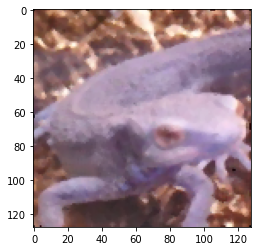

In [13]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

# 解答例
def median_filter(img, K_size=3):
    if len(img.shape)==3:  # Cが存在していたら
        H,W,C = img.shape
    else:
        img = np.expad_dims(img, axis=-1)  # 次元を最後に一つ追加
        H,W,C = img.shape
        
    # zero padding
    pad = K_size//2  # =1
    out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W,:] = img.copy().astype(np.float)
    
    tmp = out.copy()
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.median(tmp[y:y+K_size, x:x+K_size,c])
                
    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)  # paddingで使った部分を切りすてる
    
    return out

img = cv2.imread('../imori_noise.jpg')
out = median_filter(img, K_size=3)

cv2.imwrite('out10.jpg', out)
plt.imshow(out)
